In [1]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

In [2]:
df_krx = fdr.StockListing('KRX')[['Code','Name']]
df_krx.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,051910,LG화학


In [3]:
cor_list = ['DB하이텍', '에코프로', '제주은행', '카카오']

In [4]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df

,Code,Name
13,035720,카카오
21,086520,에코프로
117,000990,DB하이텍
422,006220,제주은행


In [5]:
result = pd.DataFrame()
for idx, values in cor_df.iterrows():
    df = fdr.DataReader(values['Code'],'2018')
    df['Name'] = values['Name']
    result = pd.concat([result, df])

In [6]:
result['Name'].unique()

array(['카카오', '에코프로', 'DB하이텍', '제주은행'], dtype=object)

In [7]:
result.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,28100,29504,28000,29405,1345951,0.069350,카카오
2018-01-03,30205,30306,29203,29906,1154361,0.017038,카카오
2018-01-04,30608,31911,30006,31311,2265019,0.046981,카카오
2018-01-05,31510,31711,30507,31311,1067202,0.000000,카카오
2018-01-08,32215,32616,31713,32014,1577403,0.022452,카카오


In [8]:
Changes = pd.pivot_table(index = result.index, columns = 'Name', values = 'Change', data = result)
Changes.head()

Name,DB하이텍,에코프로,제주은행,카카오
Date,,,,
2018-01-02,-0.012500,0.007607,-0.015365,0.069350
2018-01-03,0.004219,-0.041560,-0.002863,0.017038
2018-01-04,0.033613,-0.028908,0.005743,0.046981
2018-01-05,-0.028455,0.033824,-0.002855,0.000000
2018-01-08,0.020921,-0.023577,-0.001432,0.022452


In [9]:
cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
print(cum_ror)

Name
DB하이텍     4.016667
에코프로     21.898369
제주은행      1.297716
카카오       1.101971
Name: 2023-05-23 00:00:00, dtype: float64


In [10]:
start_date = Changes.index[0]
end_date = Changes.index[-1]

year = (end_date - start_date).days / 365
print(year)

5.389041095890411


In [11]:
CAGR = (1 + cum_ror) ** (1/year) - 1
print(CAGR)

Name
DB하이텍    0.348871
에코프로     0.787836
제주은행     0.166925
카카오      0.147803
Name: 2023-05-23 00:00:00, dtype: float64


In [12]:
daily_std = Changes.std() # 일 표준편차
annual_std = daily_std * np.sqrt(252) # 연 표준편차
print(daily_std, annual_std)

Name
DB하이텍    0.031739
에코프로     0.040308
제주은행     0.035150
카카오      0.023753
dtype: float64 Name
DB하이텍    0.503839
에코프로     0.639877
제주은행     0.557993
카카오      0.377061
dtype: float64


In [13]:
# 연평균수익률 = Changes.mean() * 252
# 공분산_일 = Changes.cov()
# 공분산_년 = 공분산_일 * 252
# print(연평균수익률, 공분산_년)

In [14]:
# 종목이 4 -> 100%
# 경우의 수가 많다. -> 

# 전체 비중이 100%을 넘으면 안된다.
# 우리가 계산해야할 경우는 많다.

portfolio_proportion_list = []
portfolio_return_list = []
portfolio_risk_list = []

import numpy as np

for i in range(20000):
  # 포트폴리오의 비중
    weights = np.random.random(4)
    proportion = weights / weights.sum()
    # 포트폴리오의 수익률
    portfolio_return = (CAGR * proportion).sum()
    # 포트폴리오의 리스크
    risk = (annual_std * proportion).sum()

    portfolio_proportion_list.append(proportion)
    portfolio_return_list.append(portfolio_return)
    portfolio_risk_list.append(risk)

In [15]:
# 각 종목을 데이터프레임에 넣습니다.
portfolio = pd.DataFrame(portfolio_proportion_list)
portfolio.columns = Changes.columns
portfolio.head()

Name,DB하이텍,에코프로,제주은행,카카오
0,0.129784,0.495283,0.324859,0.050073
1,0.304753,0.235449,0.137341,0.322457
2,0.244374,0.276624,0.100384,0.378618
3,0.242839,0.284803,0.160649,0.311708
4,0.436091,0.150178,0.181913,0.231818


In [16]:
portfolio['수익률'] = portfolio_return_list
portfolio['리스크'] = portfolio_risk_list
portfolio.head()

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
0,0.129784,0.495283,0.324859,0.050073,0.497108,0.582461
1,0.304753,0.235449,0.137341,0.322457,0.362400,0.502426
2,0.244374,0.276624,0.100384,0.378618,0.375907,0.498906
3,0.242839,0.284803,0.160649,0.311708,0.381985,0.511765
4,0.436091,0.150178,0.181913,0.231818,0.335084,0.504731


<Axes: xlabel='Risk', ylabel='rate_of_return'>

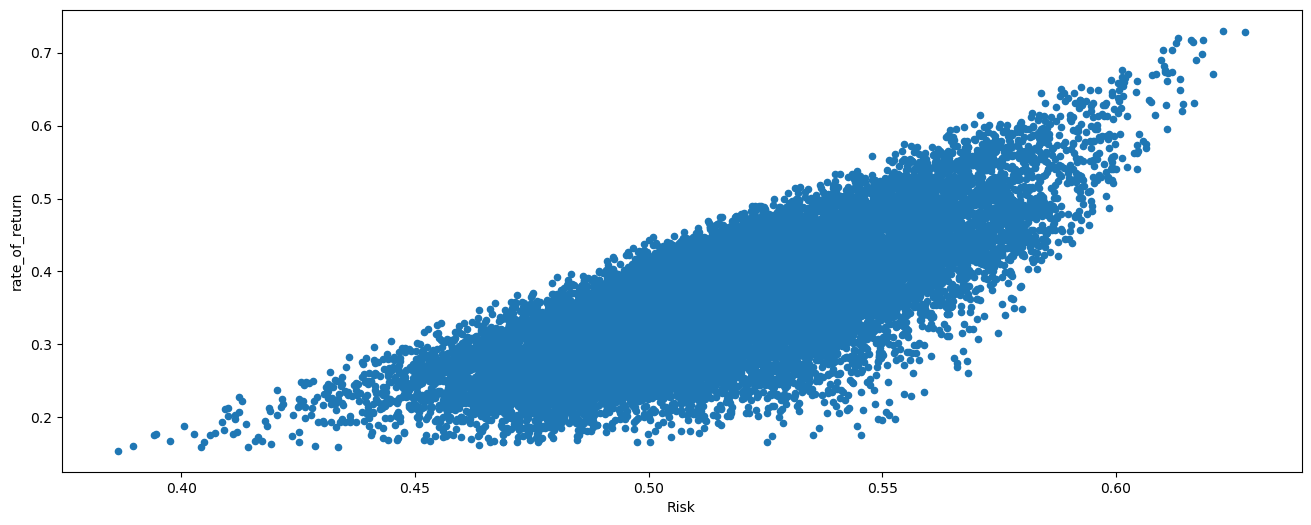

In [17]:
portfolio.plot.scatter(x = '리스크', y = '수익률', figsize = (16,6), xlabel = 'Risk', ylabel = 'rate_of_return')

In [18]:
portfolio.sort_values('수익률',ascending = False)

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
4629,0.025649,0.900729,0.033031,0.040591,0.730089,0.623016
16387,0.027003,0.896473,0.064005,0.012519,0.728229,0.627673
17606,0.026729,0.885659,0.000679,0.086933,0.720041,0.613338
19517,0.105035,0.856798,0.017315,0.020852,0.717633,0.618691
17569,0.114885,0.853754,0.000704,0.030656,0.717347,0.616134
...,...,...,...,...,...,...
8586,0.008735,0.015999,0.040042,0.935225,0.160564,0.389618
9168,0.002390,0.014221,0.128106,0.855283,0.159834,0.404280
8783,0.015126,0.008408,0.183069,0.793397,0.159726,0.414312
18391,0.027566,0.000522,0.292034,0.679878,0.159264,0.433531


In [19]:
portfolio.sort_values('리스크')

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
11807,0.026531,0.000632,0.032217,0.940620,0.154158,0.386420
8586,0.008735,0.015999,0.040042,0.935225,0.160564,0.389618
7405,0.112976,0.007927,0.003893,0.875204,0.175667,0.394172
18780,0.044620,0.030696,0.021338,0.903347,0.176829,0.394646
15364,0.004855,0.028034,0.069468,0.897642,0.168050,0.397614
...,...,...,...,...,...,...
8957,0.092277,0.829806,0.064539,0.013377,0.698694,0.618524
19517,0.105035,0.856798,0.017315,0.020852,0.717633,0.618691
9586,0.018652,0.805930,0.162950,0.012468,0.670491,0.620720
4629,0.025649,0.900729,0.033031,0.040591,0.730089,0.623016


In [20]:
portfolio['샤프지수'] = portfolio['수익률'] / portfolio['리스크']
portfolio.head()

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크,샤프지수
0,0.129784,0.495283,0.324859,0.050073,0.497108,0.582461,0.853462
1,0.304753,0.235449,0.137341,0.322457,0.362400,0.502426,0.721300
2,0.244374,0.276624,0.100384,0.378618,0.375907,0.498906,0.753462
3,0.242839,0.284803,0.160649,0.311708,0.381985,0.511765,0.746407
4,0.436091,0.150178,0.181913,0.231818,0.335084,0.504731,0.663887


In [21]:
portfolio.sort_values('샤프지수', ascending = False)

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크,샤프지수
17606,0.026729,0.885659,0.000679,0.086933,0.720041,0.613338,1.173971
4629,0.025649,0.900729,0.033031,0.040591,0.730089,0.623016,1.171863
17569,0.114885,0.853754,0.000704,0.030656,0.717347,0.616134,1.164271
16843,0.008423,0.880683,0.018073,0.092821,0.713508,0.612857,1.164234
16387,0.027003,0.896473,0.064005,0.012519,0.728229,0.627673,1.160205
...,...,...,...,...,...,...,...
9461,0.027244,0.000310,0.661333,0.311112,0.166125,0.500253,0.332083
19120,0.046301,0.003068,0.788459,0.162172,0.174153,0.526395,0.330841
14851,0.020358,0.013043,0.841133,0.125466,0.176328,0.535258,0.329427
19414,0.035345,0.006621,0.896657,0.061377,0.176293,0.545516,0.323167
